<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Transformer Models Overview</center></font></h1>
<h1><center>Sarcasm Detection Use Case</center></h1>
<h3><center>Charlcye Mitchell, April 2024</center></h3>

# **Creating a Transformer Model for Sarcasm Detection**

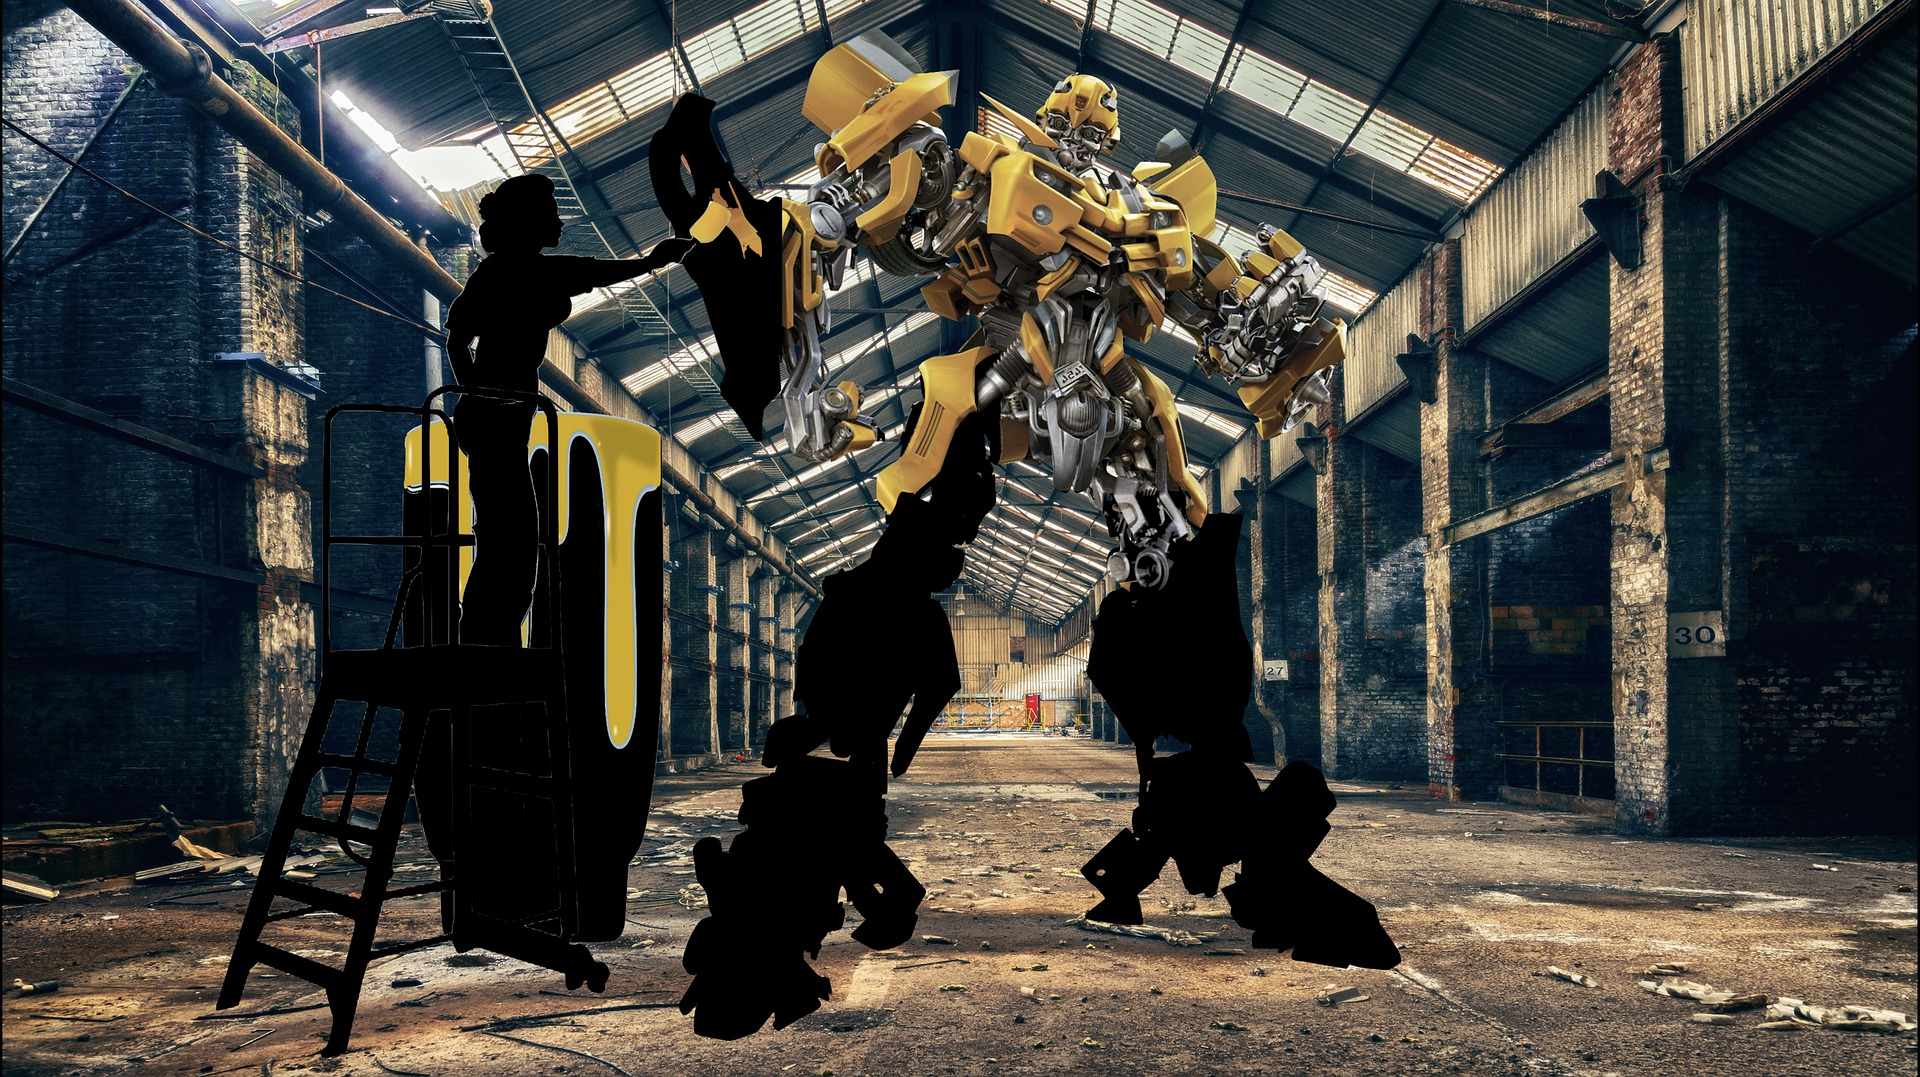

[Image Source](https://pixabay.com/illustrations/bumblebee-transformers-painting-7004029/)

## **Into the World of Transformers**

Transformers are a type of Deep Learning model that have revolutionized the field of Natural Language Processing.

**They were first introduced in 2017 by Ashish Vaswani and a team of researchers from Google and the University of Toronto, in a landmark research paper called "[Attention is All You Need](https://arxiv.org/pdf/1706.03762.pdf)"**, which has gone on to become one of the most-cited research papers in the history of Deep Learning and AI. Ever since then, Transformer models have become the state-of-the-art in various NLP tasks such as Machine Translation (the original use case for which it was developed), Text Classification and Question Answering.

What sets Transformer models apart from the RNN-based architectures from earlier or previous Deep Learning architectures, is their usage of **self-attention mechanisms**. Self-attention allows the model to focus on different parts of the input sequence at different times, allowing it to make more informed decisions about the relationships between different elements of the sequence. This is a key requirement in the way humans perform Natural Language Understanding - when reading sentences, humans take into account context and relationships between various words in the sentence, and automatically infer meanings of ambiguous words in ways that machines had trouble doing before. The large web of interconnections that exist between words in sentences was a key issue with word embeddings and RNN/LSTM-based approaches, and the creation of **high-quality contextualized embeddings** is the main problem that Transformers have been so successful at solving in NLP.

In a nutshell:

- Transformers are Deep Learning models that adopt the mechanism of self-attention, differentially weighting the significance of each part of the input data.
- They hold the potential to understand the relationships between sequential elements (such as words in a sentence) that may even be very far from each other - this is a key point of difference from RNNs & LSTMs.



## **Note**

The name **Transformer** comes from the nature of the non-linear transformations taking place inside the model to transform the input words from their initial embeddings to their final representation. This of course includes the Self-Attention & Multi-head Attention mechanism including the Softmax transformation, and eventually the feed-forward Neural Network with its own non-linear transformations.

At a high-level, Transformers are merely an extension of the same concept which has been central to the whole field of Deep Learning - finding the best vector space projection / representation (also called embedding) of your input in alternate dimensions, which makes it straightforward for the model to easily choose the right output with high accuracy. This is the core idea behind every Deep Learning model.

However, with Transformers, the specifics are more complicated, and understanding the nuts and bolts of how exactly this vector embedding is achieved, is harder than with simpler Neural Networks like CNNs, RNNs & LSTMs. Due to being such a recent innovation in the world of AI, there hasn't been enough time for the industry and the NLP community to fully understand the intuition and implications behind the design of the Transformer architecture - the expected outcomes from the rest of this material will be to cover the "What" and the "How" behind the working of the key "**Encoder**" block inside Transformers, but not necessarily the "Why" (why it works so well). Deep Learning, being sometimes more an art than a science, always has an element of being a Black-box model which is not fully interpretable, and that is especially true for Transformers, which have taken the game up a whole new level in terms of the complexity of the model architecture. However, in the discussion of the key mathematical and programmatic concepts that lead to the Encoder block of a Transformer, one expected outcome in this direction will be a brief intuition with examples behind why certain choices were made in the architecture and why those choices work.

## **Sarcasm Detection as an NLP Problem**

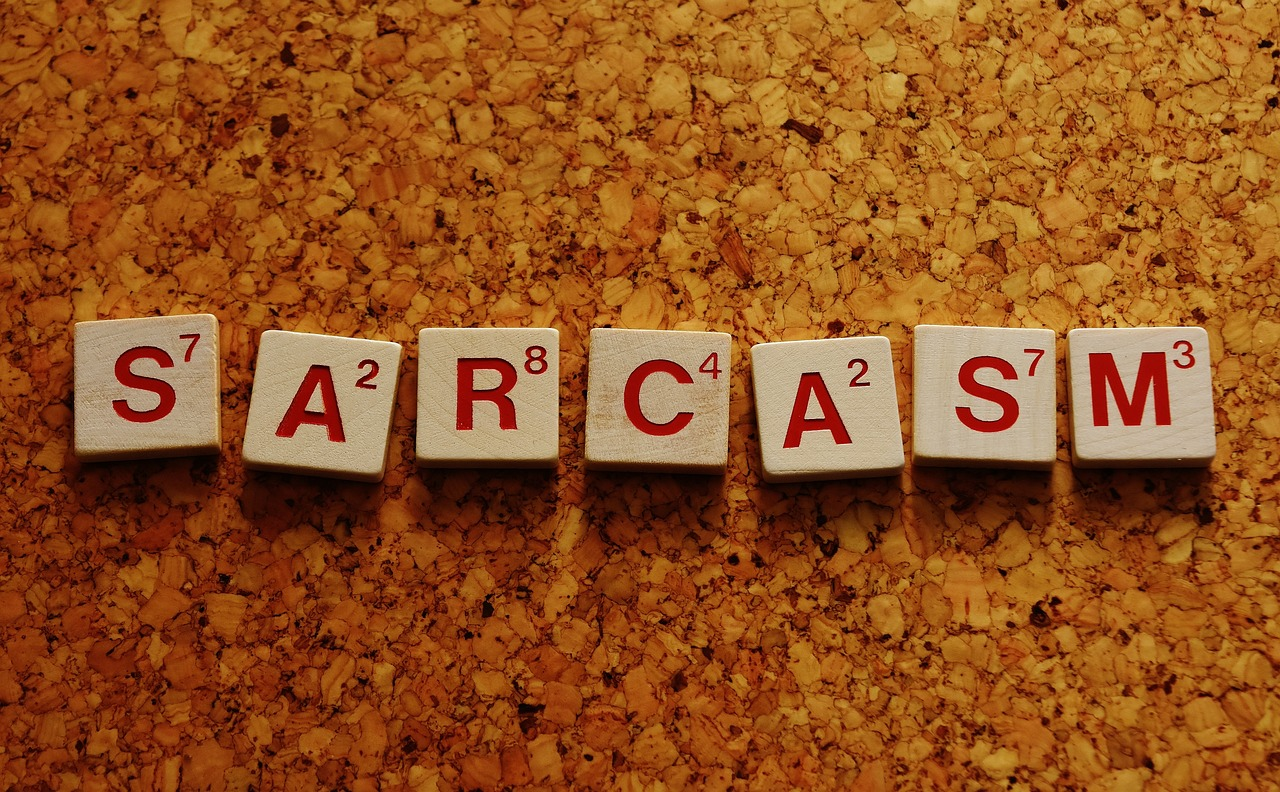

In this notebook, we will be using one of the simplest possible Transformer models, **One Encoder Block** (modern Transformer-based Large Language Models are often composed of several Encoder and Decoder blocks), to perform binary Text Classification in the form of Sarcasm Detection - detecting if a news headline is sarcastic or not.

The reason Sarcasm Detection is more difficult than a typical Text Classification task in Machine Learning, is that sarcasm comes not from individual unique words, but from the way words co-occur with each other and the context in which they appear. This makes the usage of contextualized models such as Transformer-based architectures, particularly well-suited for the challenge.

A Sarcasm Detector would potentially find use in the following areas:

**1. Social Media / Forum Websites:** Sarcasm detection is usually one part of the stack utilized in the NLP language models of social media / forum organizations in any attempt to curb bullying / hate speech.

**2. Customer Feedback:** Businesses looking to achieve true Natural Language Understanding of its customers' feedback on social media or on the business website would need to have sarcasm detectors inbuilt in the language model beig utilized for the task.

**3. Chatbots:** Sarcasm detection can also be an important part of making conversational agents such as chatbots more capable of handling the variety of expressions and language usages they would encounter when interacting live with human customers.

## **1. Importing the libraries**

The first set of libraries being imported here are the Text Preprocessing and Data Visualization libraries for this problem statement

In [ ]:
import numpy as np
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The following are the Deep Learning modules needed from TensorFlow & Keras.

You will notice the MultiHeadAttention module - the key element of the Transformer's Self-Attention mechanism, being imported from Keras. The working of Multi-Head Attention will be explained further along in the notebook.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

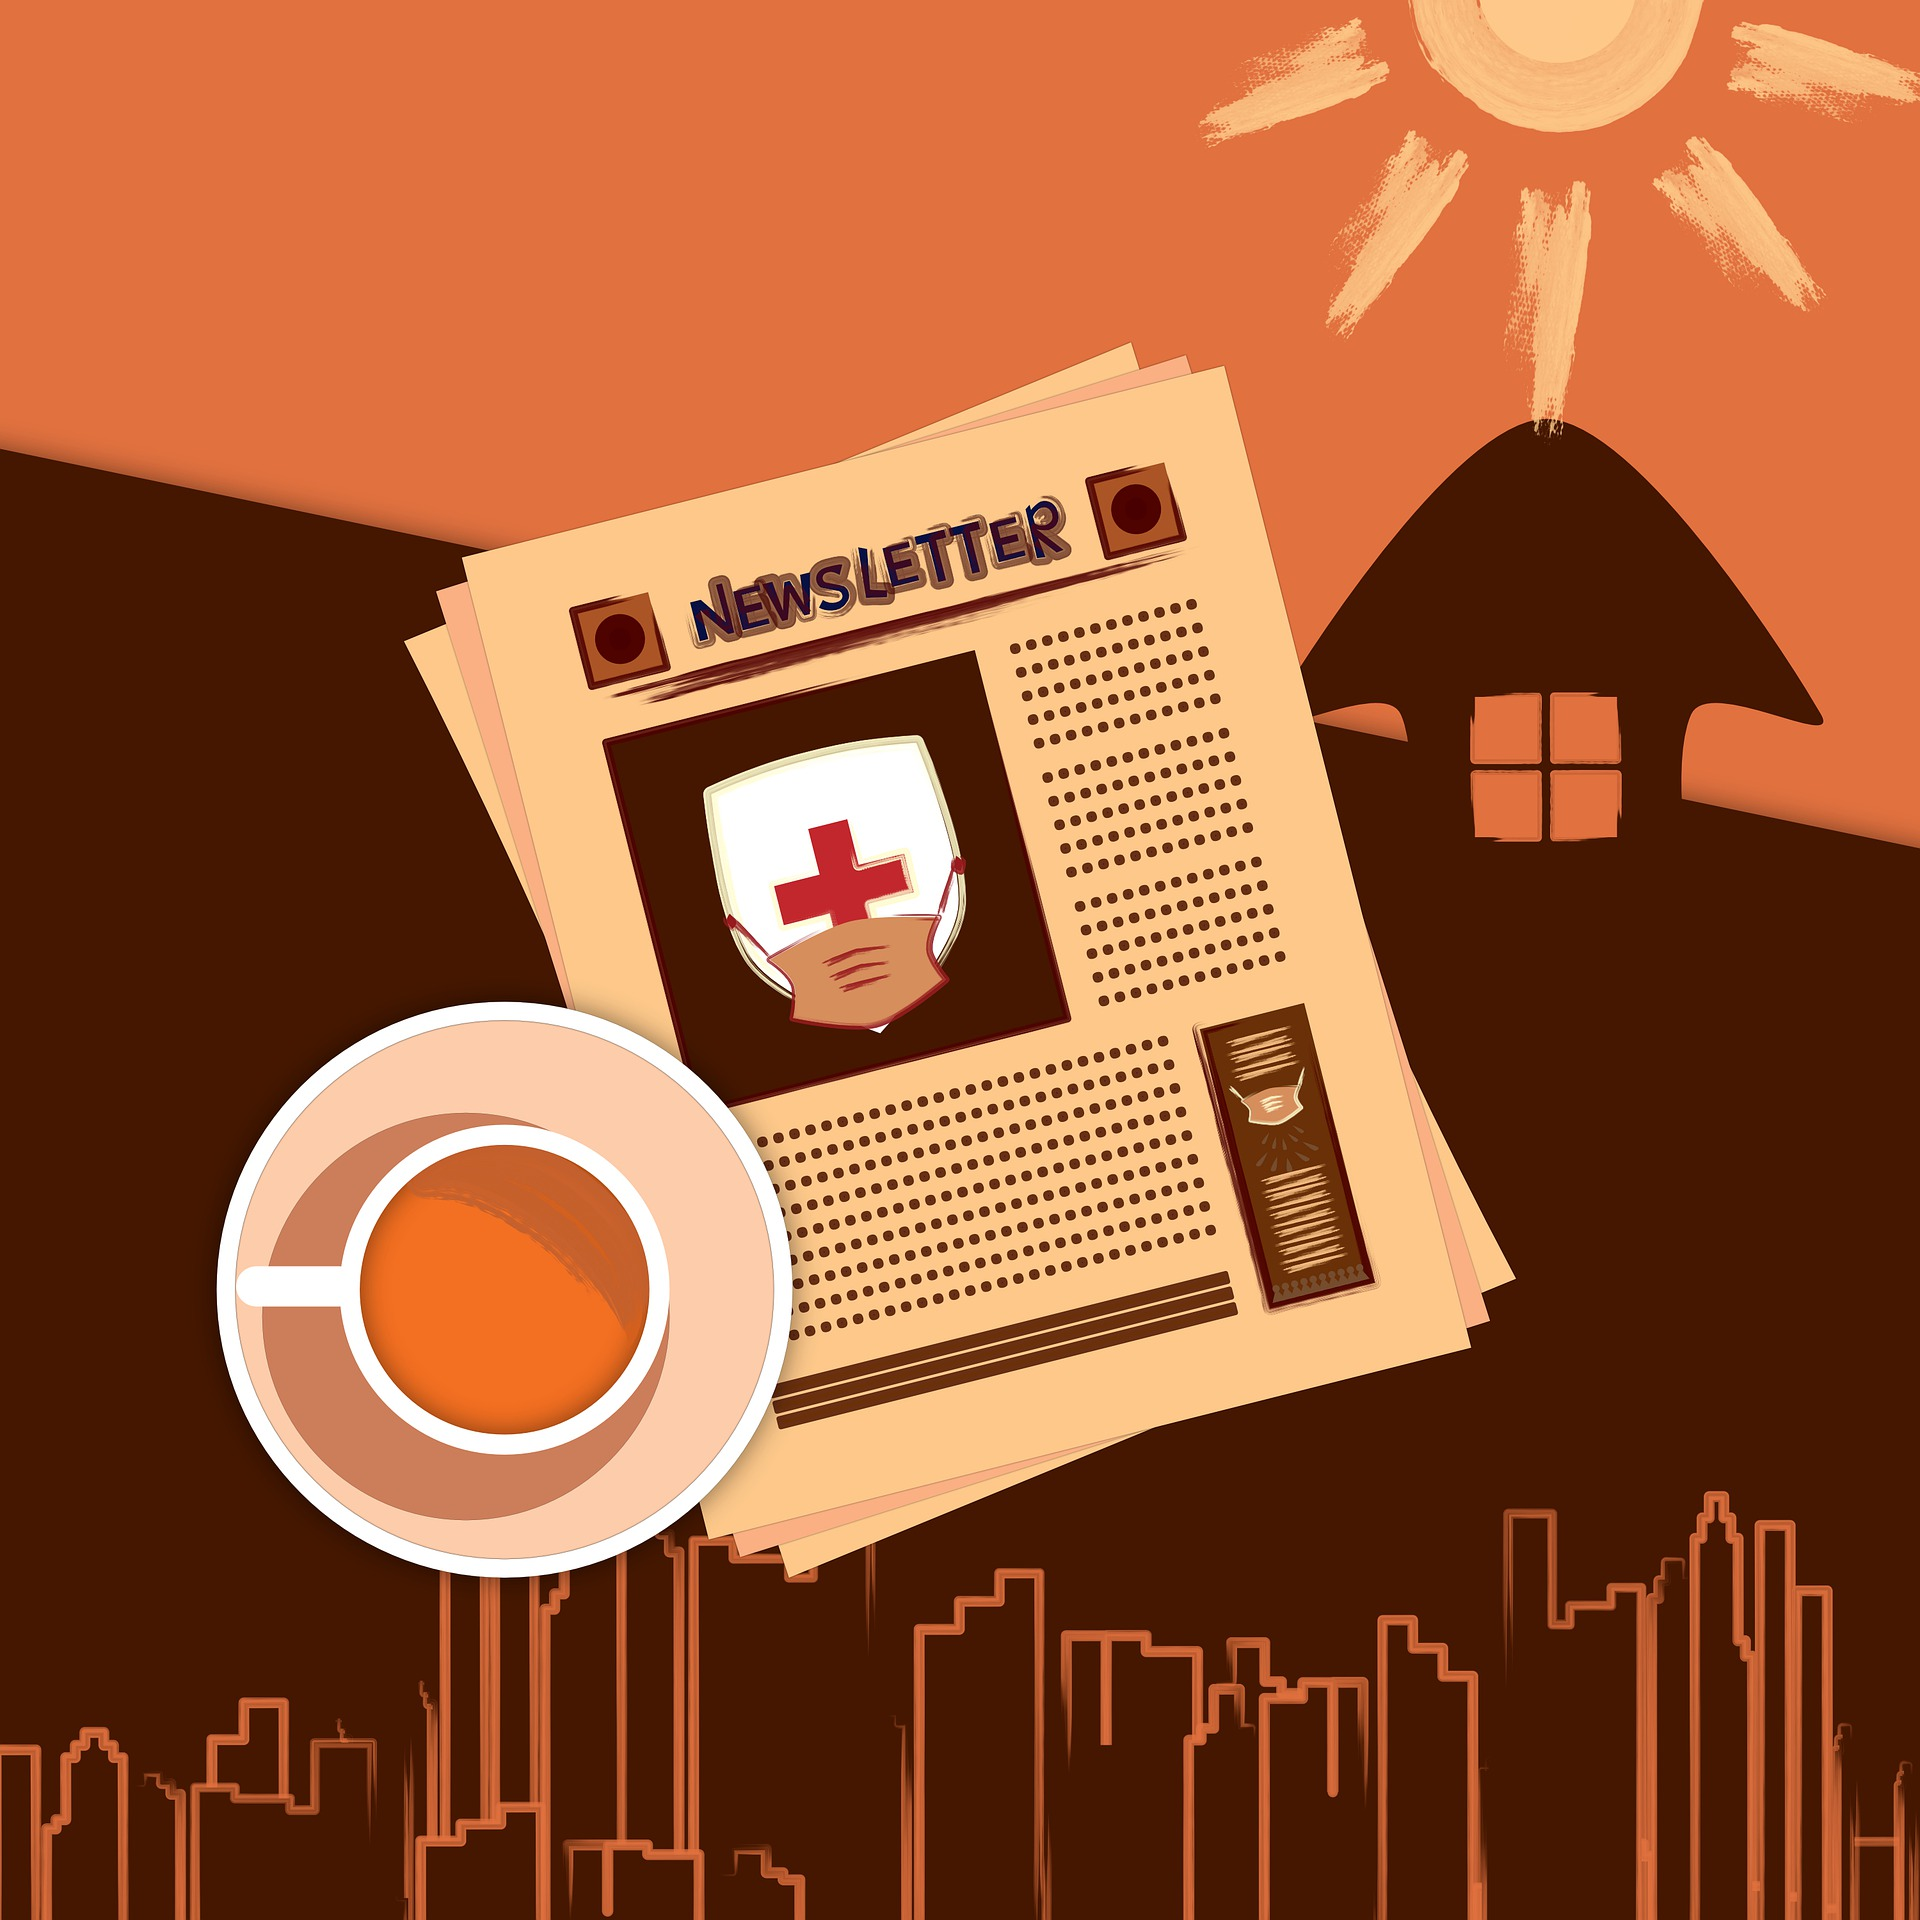

[Image Source](https://pixabay.com/illustrations/newspaper-article-headline-4936843/)

## **2. Preparing the Sarcastic Headlines Detection Dataset**

In [ ]:
data1 = pd.read_json('/content/Sarcasm_Headlines_Dataset_v2.json', lines=True)
data2 = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)

In [ ]:
data1 = data1[['headline','is_sarcastic']]
data2 = data2[['headline','is_sarcastic']]

data = pd.concat([data1,data2])
data.reset_index(drop=True, inplace=True)

In [ ]:
data

headline  is_sarcastic
0      thirtysomething scientists unveil doomsday clo...             1
1      dem rep. totally nails why congress is falling...             0
2      eat your veggies: 9 deliciously different recipes             0
3      inclement weather prevents liar from getting t...             1
4      mother comes pretty close to using word 'strea...             1
...                                                  ...           ...
55323               american politics in moral free-fall             0
55324                            america's best 20 hikes             0
55325                              reparations and obama             0
55326  israeli ban targeting boycott supporters raise...             0
55327                  gourmet gifts for the foodie 2014             0

[55328 rows x 2 columns]

## **3. EDA and Text Preprocessing**

### 3.1 Checking for Missing Values

In [ ]:
data.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

- There are fortunately no missing values in this dataset that need to be dealt with.

### 3.2 Class Balance / Imbalance

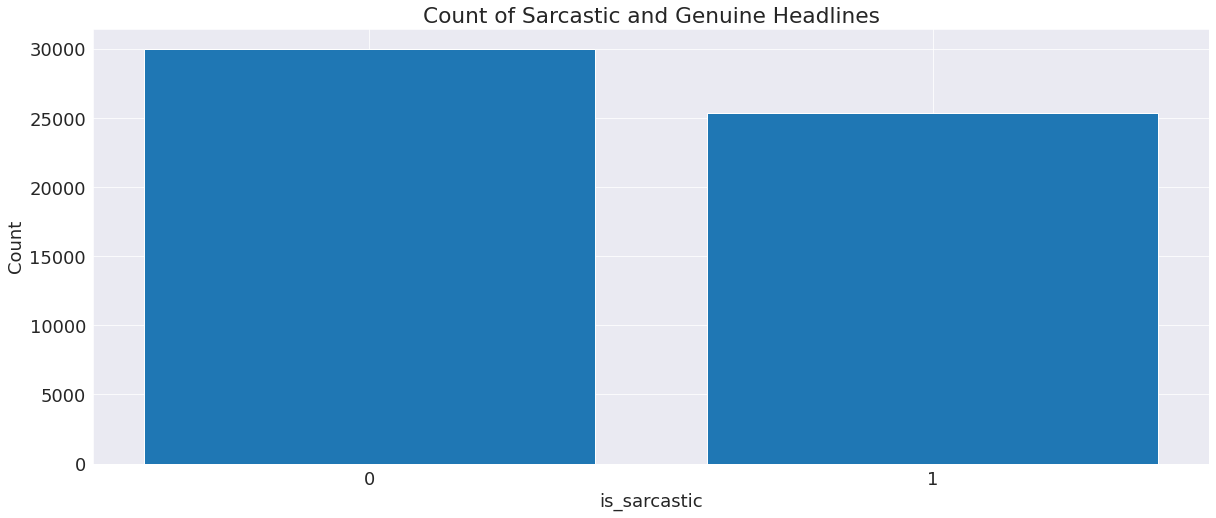

In [ ]:
import matplotlib.pyplot as plt

# Group the data and count the values
grouped_data = data.groupby('is_sarcastic').count().reset_index()

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(x=grouped_data['is_sarcastic'], height=grouped_data['headline'])

# Set the x-tick labels to '0' and '1'
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

# Set the title and axis labels
ax.set_title('Count of Sarcastic and Genuine Headlines')
ax.set_xlabel('is_sarcastic')
ax.set_ylabel('Count')

# Show the plot
plt.show()

### 3.3 Special Character Removal
- We will not remove numbers from the text data right away - let's further analyze the dataset to see if they contain any relevant information.
- We can find the entity type of the tokens in the sentences using Named Entity Recognition (NER) - this will help us identify the type and relevance of the numbers in our text data.

In [ ]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):

    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()

    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)

    return headline

In [ ]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['headline'].progress_apply(get_entities)

In [ ]:
data['clean_headline'] = data['headline']

In [ ]:
data['sentence_length'] = data['clean_headline'].apply(lambda x: len(x.split()))
data

### 3.4 Headline Length Distribution
- We shall construct a boxplot to check for any outlier lengths of headline sentences.
- Normally, news headlines wouldn't be longer than 20-30 words.

In [ ]:
plt.boxplot(data['sentence_length'], vert= False)    #, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", marginal="box")
plt.show()

In [ ]:
data[data['sentence_length']>140]['headline']

- There's clearly one outlier visible, which seems to have over 140 words.
- As there's only one such outlier, we can drop this particular headline to proceed, as the rest of the headlines seem to have 40 words or below.
- This is a key part of the NLP Preprocessing pipeline, because the **lengthiest headline size (in addition to a Start Token & End Token) is used as the length of the vector embedding used to represent each headline in numberical format while feeding it into the Transformer.**
- As such, we don't want there to be one headline with 140+ words, which would need all the other headlines to have 100+ sparse elements in their vector embedding.

### 3.5 Dropping the Outlier Headline

In [ ]:
data.drop(data[data['sentence_length'] > 140].index, inplace = True)
data.reset_index(inplace=True, drop=True)

In [ ]:
plt.boxplot(data['sentence_length'], vert= False)    #, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", marginal="box")
plt.show()

- We are now ready to proceed.

### 3.6 Headlines Length Distribution: Outliers Removed
- The headlines after the removal of outliers do not exceed the limit of 20-30 words
- They are mostly centered in the range of 5-10 words

In [ ]:
plt.hist(data['sentence_length'], bins = 100)
plt.show()

### 3.7 Filtering - Finding Sentences that Contain Numbers

Let us now re-visit the earlier point about some headlines containing numerical data, to decide if these should be filtered out or retained due to their importance to the meaning of the headline.

In [ ]:
data['contains_number'] = data['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))
data

Let us try to perform a simple analysis of headline samples containing numbers of the entity types - **Time, Date or Cardinal**
- The numbers in text data can have different implications.
- Naïve text preprocessing methods would suggest that numbers should be removed alongwith special characters.
- But let's dig deeper and understand the entity type of these numbers to get the exact implications.

#### 3.7.1 10 Random Samples - The Date Entity

In [ ]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='DATE')].sample(10)

#### 3.7.2 10 Random Samples - The Time Entity

In [ ]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='TIME')].sample(10)

#### 3.7.3 10 Random Samples - The Cardinal Entity

In [ ]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='CARDINAL')].sample(10)

**Inferences:**
- A lot of these headlines would in fact not make sense without these time,date or cardinal numbers.
- In this instance, it appears that we should retain these numbers and hence, we shall **not** preprocess them out of our dataset.

### 3.8 Word Visualization - Word Clouds

In [ ]:
sarcastic = data[data['is_sarcastic']==1]['clean_headline'].tolist()
genuine = data[data['is_sarcastic']==0]['clean_headline'].tolist()

#### 3.8.1 Top 40 Words: Sarcastic Headlines

In [ ]:
wordcloud = WordCloud(max_words=40, width=400, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.8.2 Top 40 Words: Genuine Headlines

In [ ]:
wordcloud = WordCloud(max_words=40, width=400, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **4. Model Building**

Let's now proceed into the model-building aspect of the problem statement.

In [ ]:
sentences = data['clean_headline']
label = data['is_sarcastic']

### 4.1 Train - Validation - Test Split (80:10:10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

### 4.2 Tokenization

We will perform 2 steps here:
- Splitting sentences into words
- Finding the unique vocabulary size in this dataset

In [ ]:
max_len = 20
oov_token = '00_V'
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  30133


### 4.3 Encoding of the Inputs
- We will be converting the sentences to tokens followed by padded sequences in encoded format.
- These are numeric encodings assigned to each word.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

### **Transformers: Attention is All You Need**

- Let's now dive into the centerpiece of this notebook - **building our prototypical Transformer model.**
- As mentioned, for the purpose of this Sarcasm Detection problem, we will use only the "**Encoder**" block of the original Transformer model from 2017 (Encoder-Decoder architecture).
- The Encoder Block deconstructed is itself a fairly complex set of operations as seen below.

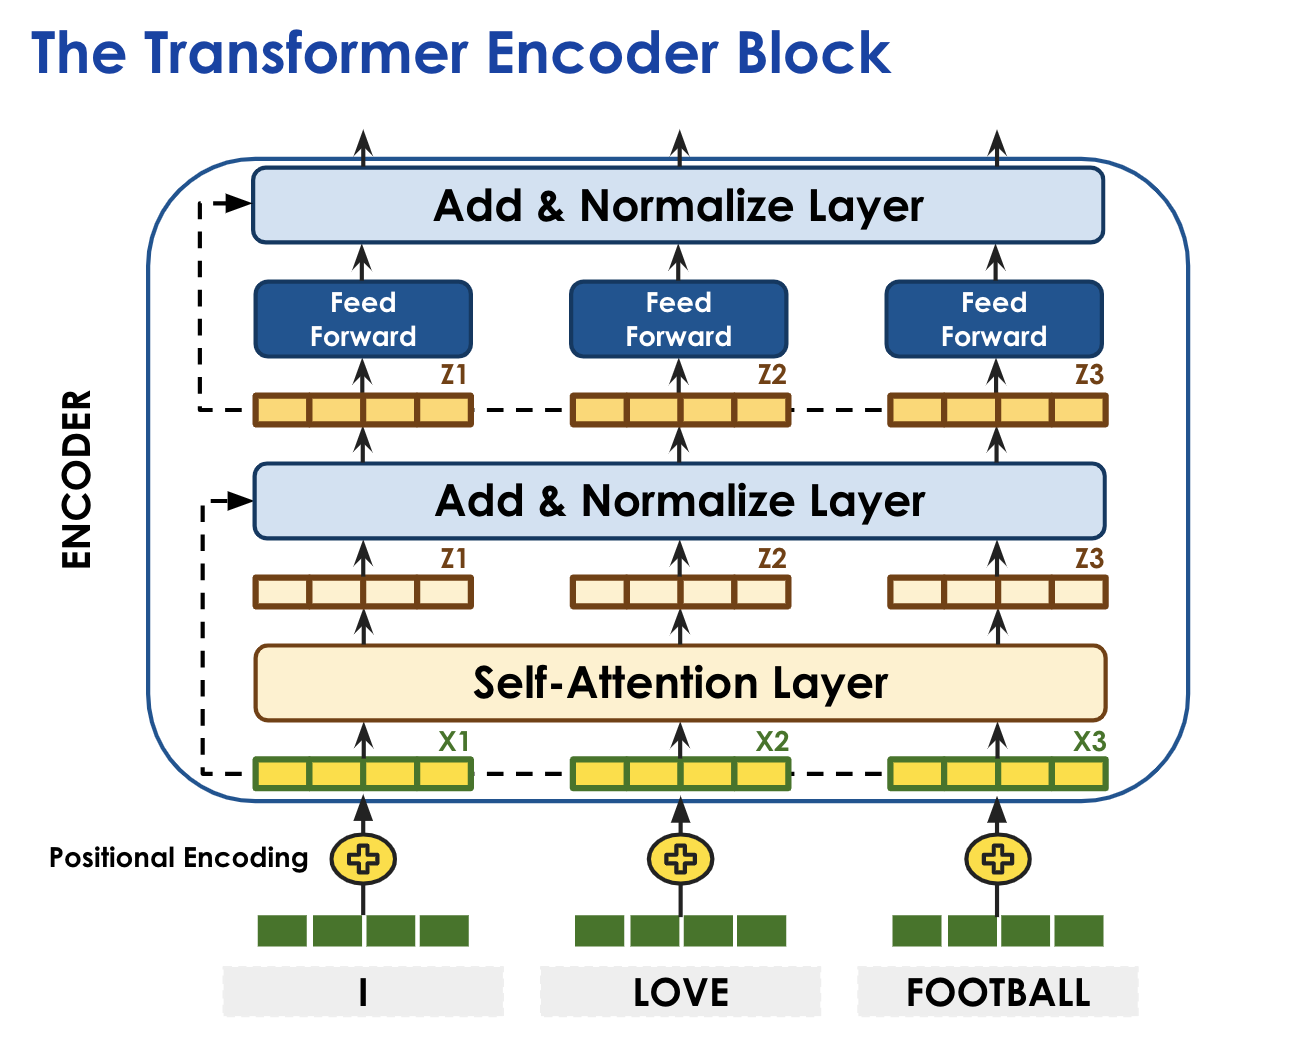

**We shall attempt to understand this architecture piece-by-piece** and build up to the full Encoder block, which will then be used for our Text Classification problem.

### **Multi-head Attention**

- **Multi-head Attention is the key behind the Self-Attention Layer of the Encoder block.** It is a module which runs through an attention mechanism several times in parallel. Multiple independent attention outputs are then concatenated and linearly transformed into the expected dimension.
- Multi-head Attention is merely multiple instances (heads) of the same Self-Attention mechanism occurring in the same layer. So, before we move on to Multi-head Attention, **let's take a look at how each head of the Multi-head Attention mechanism works - i.e. the Self-Attention mechanism itself.**

### **Self-Attention**


- The first step is that **each word in the sentence is pre-converted into its respective embeddings (Word2vec is one possible example).**

- **These embeddings are then multiplied by three weight vectors (namely W-K, W-Q, W-V), which are learnable matrices that can be initialized randomly, to create Key (K), Query (Q) and Value (V) triplets for each word.**

- So the embedding vector of each word (let's say X) is multiplied with the W-K vector to produce the K vector, it is multiplied with the W-Q vector to produce the Q vector, and similarly the embedding is multiplied with the W-V vector to produce the V vector.

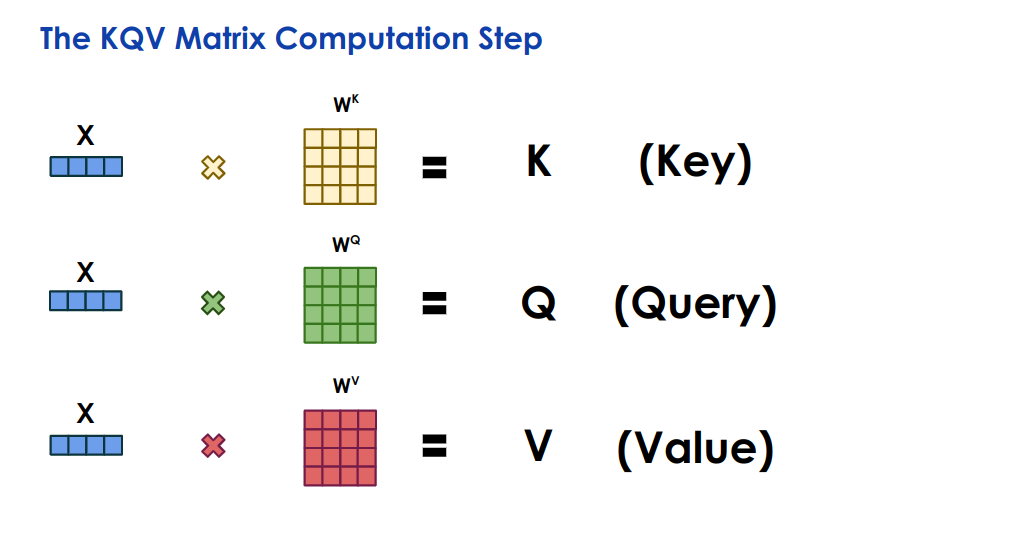

- On computing the K, Q & V vectors, **the Q vector of each word is multiplied with the K vector of itself, and with the K vector of other words.**
- This multiplication of Q vectors of each word with the K vector of itself and every other word, gives us an intuitive sense of how strong the attention between any particular pair of words is.

- In other words, the value of q_i * k_j gives us the attention score that the i th word has upon the j th word in the same sentence.

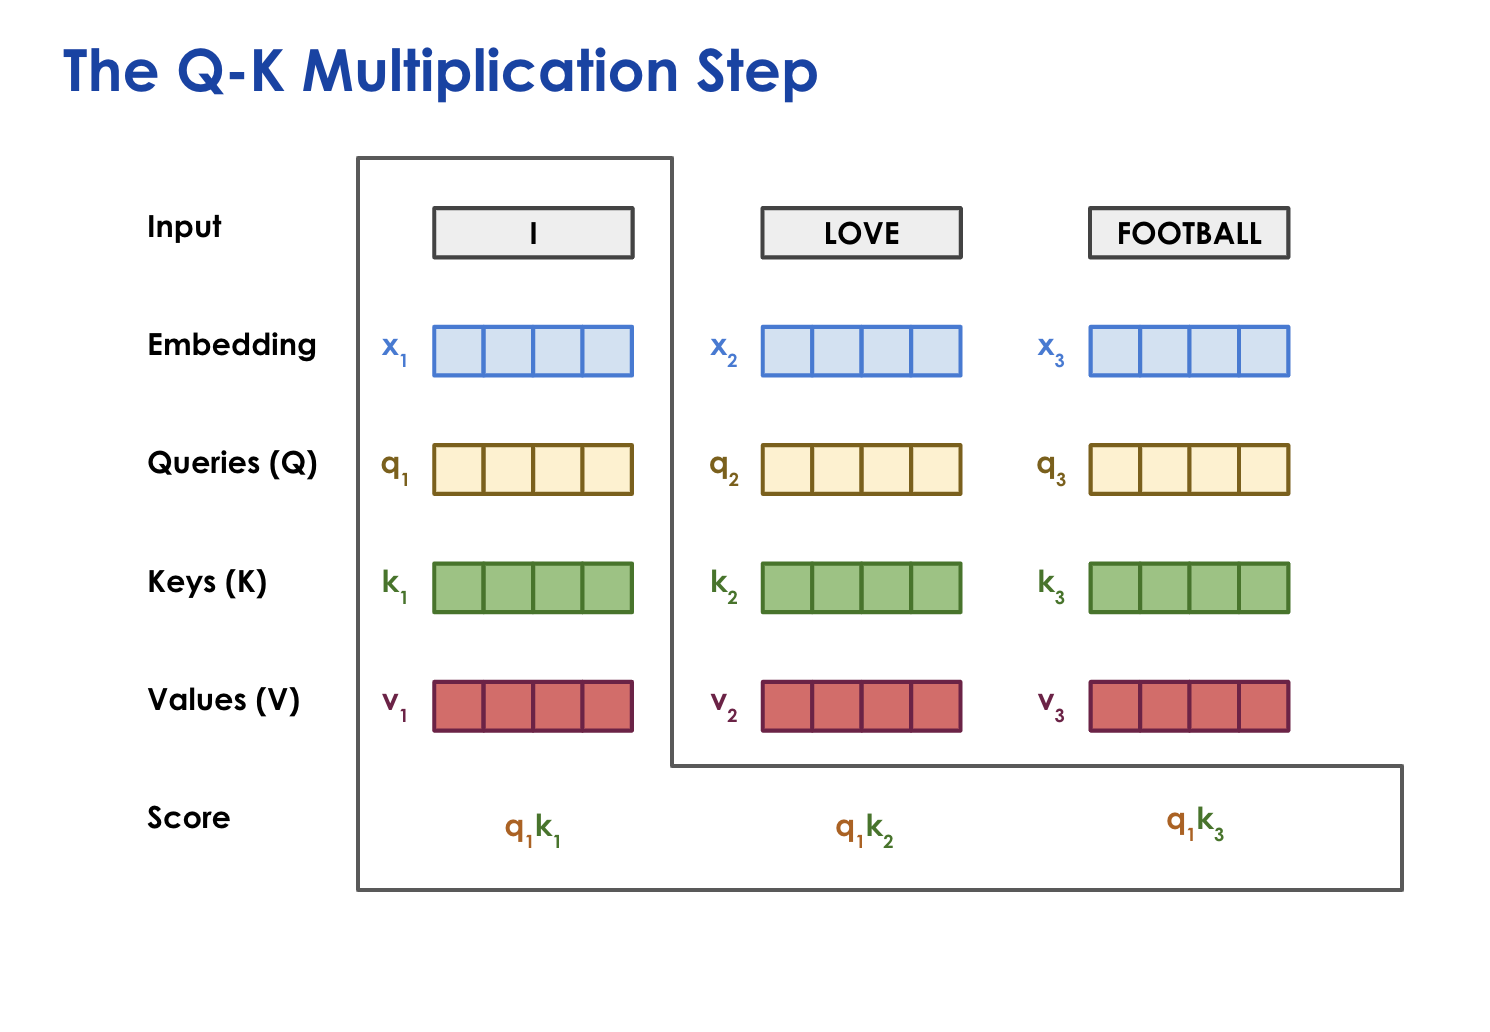

- Then, the products of these vectors are [softmaxed](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer#:~:text=Softmax%20Formula&text=where%20all%20the%20zi%20values,constituting%20a%20valid%20probability%20distribution.) and divided by a particular factor **d** (the square root of the dimension of the key vector, in the original paper), and this result is multiplied with the V vector element wise. That is, the softmax of the product of q_i and k_j divided by the factor, is multiplied with v_j.

- Then these products of q_i, k_j, and v_j, are summed up to form the z_i values.

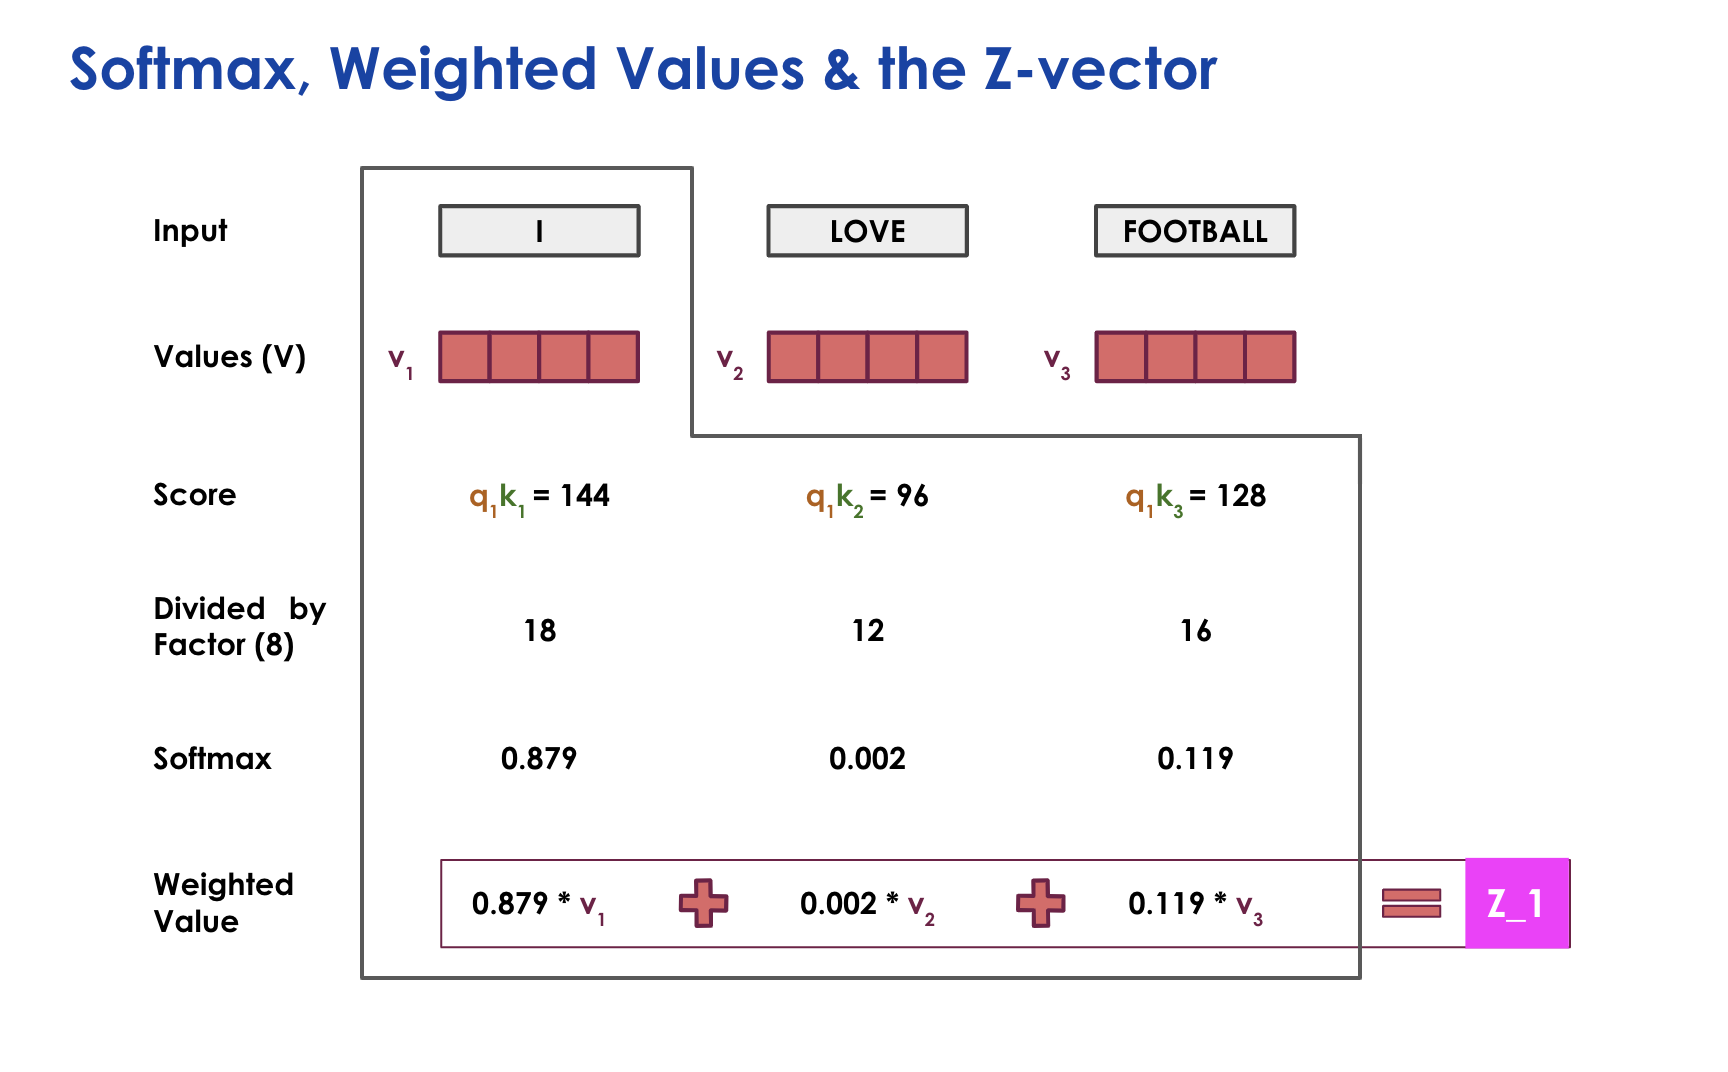

- Remember, the diagram above is just calculating the Z_1 for the first query (q1) - corresponding to the first word "I".
- Similarly, a Z_2 would be calculated for the word "Love" and a Z_3 would be computed for the word "Football".
- These Z_i are essentially the rows of the combined self-attention head Z matrix.


- Let's summarize the steps so far. Consider we have three words, "I" (q_1, k_1, v_1), "Love" (q_2, k_2, v_2), and "Football" (q_3, k_3, v_3).

- So,
 - Z_1 = softmax(q_1.k_1/d).v_1 + softmax(q_1.k_2/d).v_2 + softmax(q_1.k_3/d).v_3
 - Z_2 = softmax(q_2.k_1/d).v_1 + softmax(q_2.k_2/d).v_2 + softmax(q_2.k_3/d).v_3
 - Z_3 = softmax(q_3.k_1/d).v_1 + softmax(q_3.k_2/d).v_2 + softmax(q_3.k_3/d).v_3

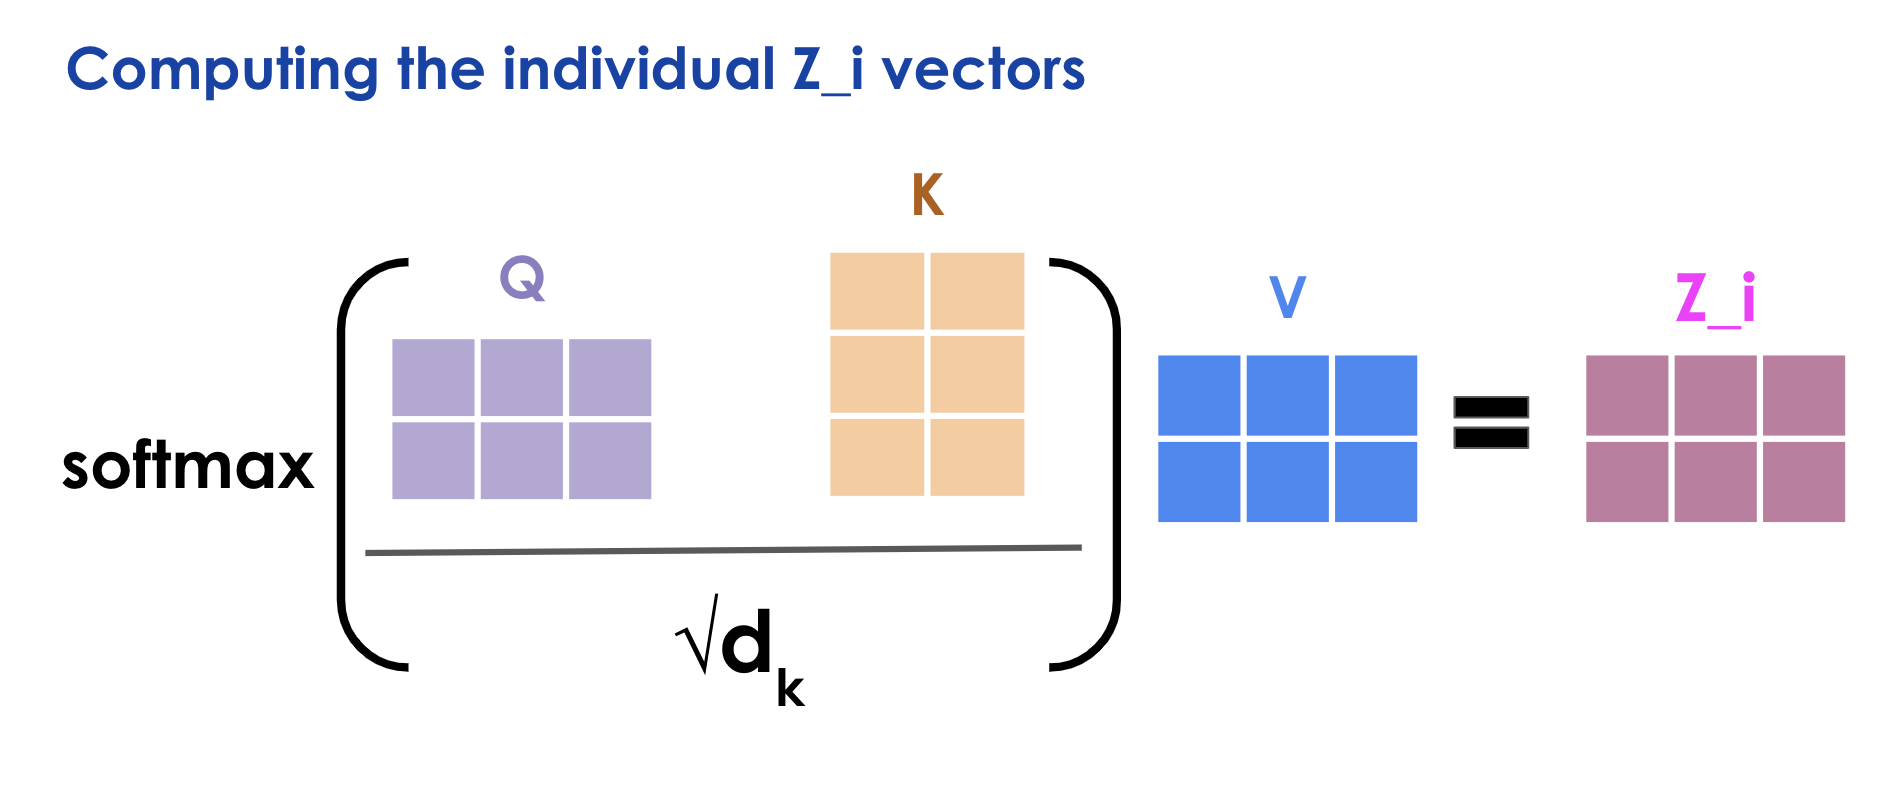

- **We then concatenate Z_1, Z_2 and Z_3 row-wise to form the Z matrix, which represents our individual Self-Attention head.**

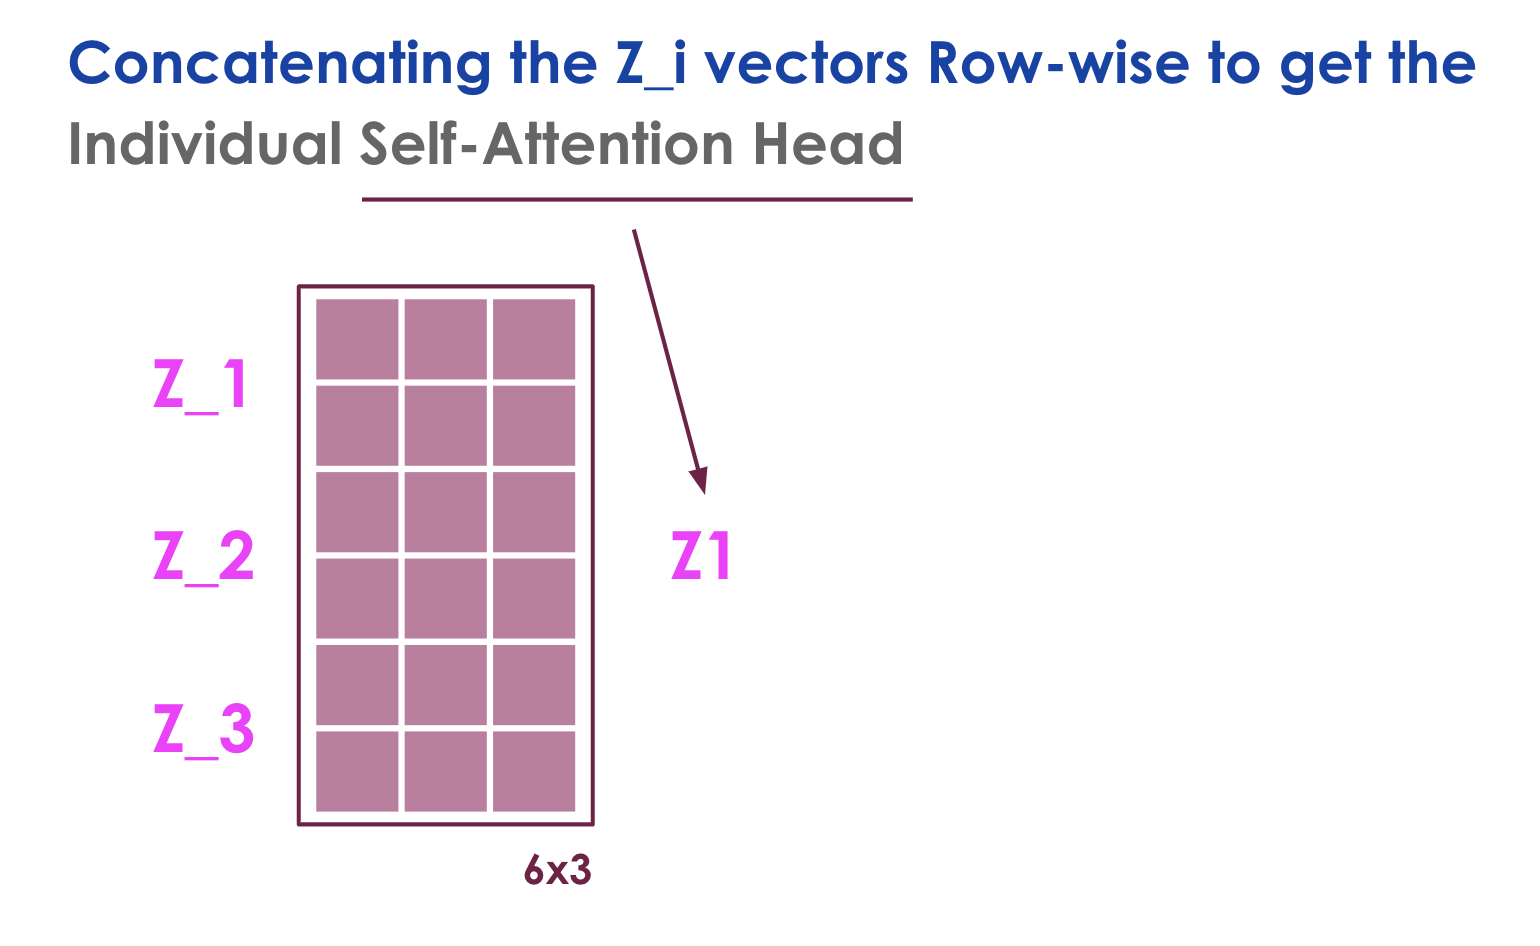

**Note:** 6x3 is just an example dimension size - there is no compulsion on the size of these Z_i matrices (which depend on the size of the initial word embeddings for each word) This example is being provided to show how the 6x3 size is retained after the next step.

- This is what a Single Attention Head does. **A Multi-head Attention has multiple W-Q, W-K, and W-V vectors.** **Therefore instead of a word producing just one triplet of K, Q, and V vectors, it produces multiple such triplets.**

- Since each Attention Head produces one final Z matrix (which itself is the concatenation of the Z_i vectors of each word), in Multi-Head Attention, we're actually talking about multiple such Z matrices.

- Let's call these **multiple individual Self-Attention heads Z1, Z2, Z3** (as opposed to the Z_1, Z_2, Z_3 inside such a Z1 itself).

- These multiple Self-Attention Heads Z are concatenated column-wise (horizontally stacked) and then they are multiplied with a weight vector (let's say W0), which is shaped in such a way that it converts the concatenated multiple-head matrix back to the size of one single Attention head Z vector.

- Having Multiple Attention heads in this manner allows for attending to various parts of the sequence differently. During Self Attention, a word's attention score with itself will be the highest, therefore by using Mutli-head Attention a word can establish its relationship with other words in the sequence by calculating the attention scores with them in parallel.

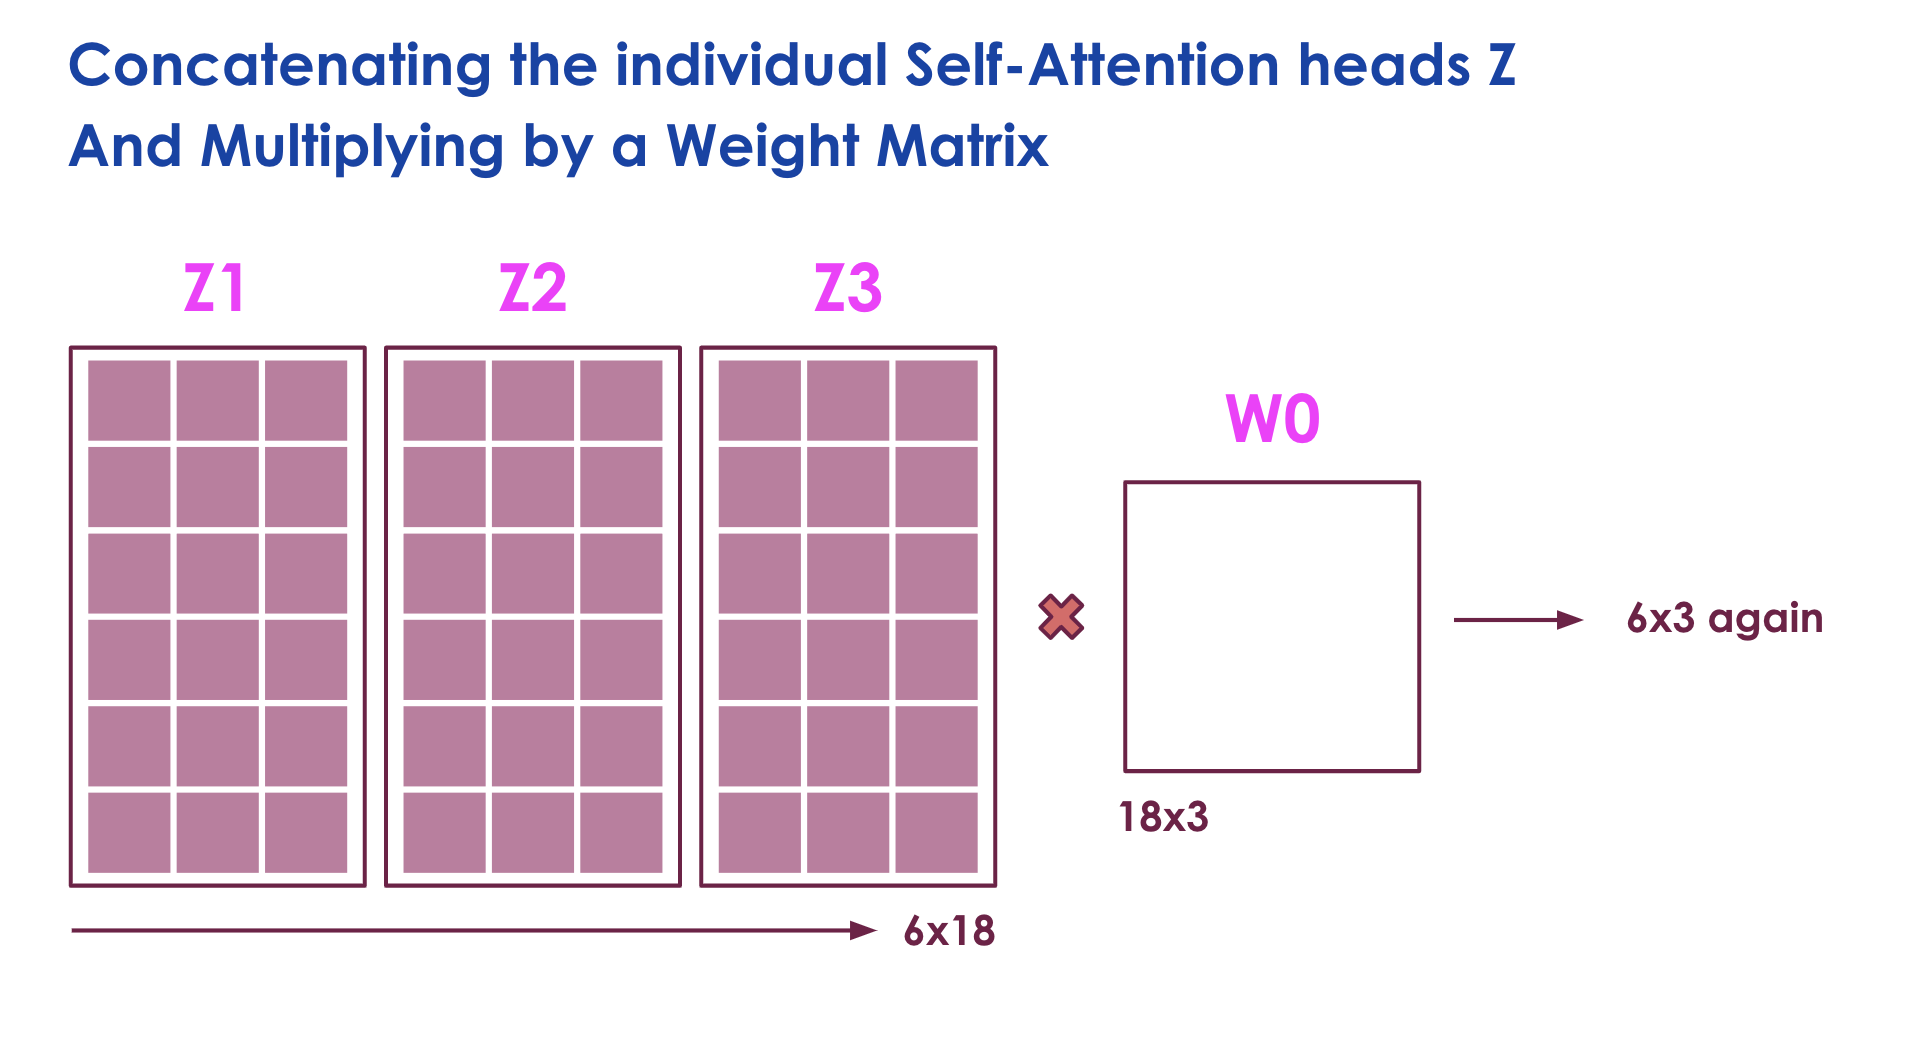

**Note:** As we see from the dimension sizes, the W0 matrix size is chosen such that we'll eventually only get a final matrix of size 6x3 again.

- Keras's MultiHeadAttention adds an attention layer with as many heads as specified. The key_dim parameter determines the dimensionality of each z_i vector.

- To construct the rest of the Encoder block, we shall need Dropout layers, Dense Layers and we will also have some skip layers where we will add and normalize. Let's take a look at the Encoder Architecture again.

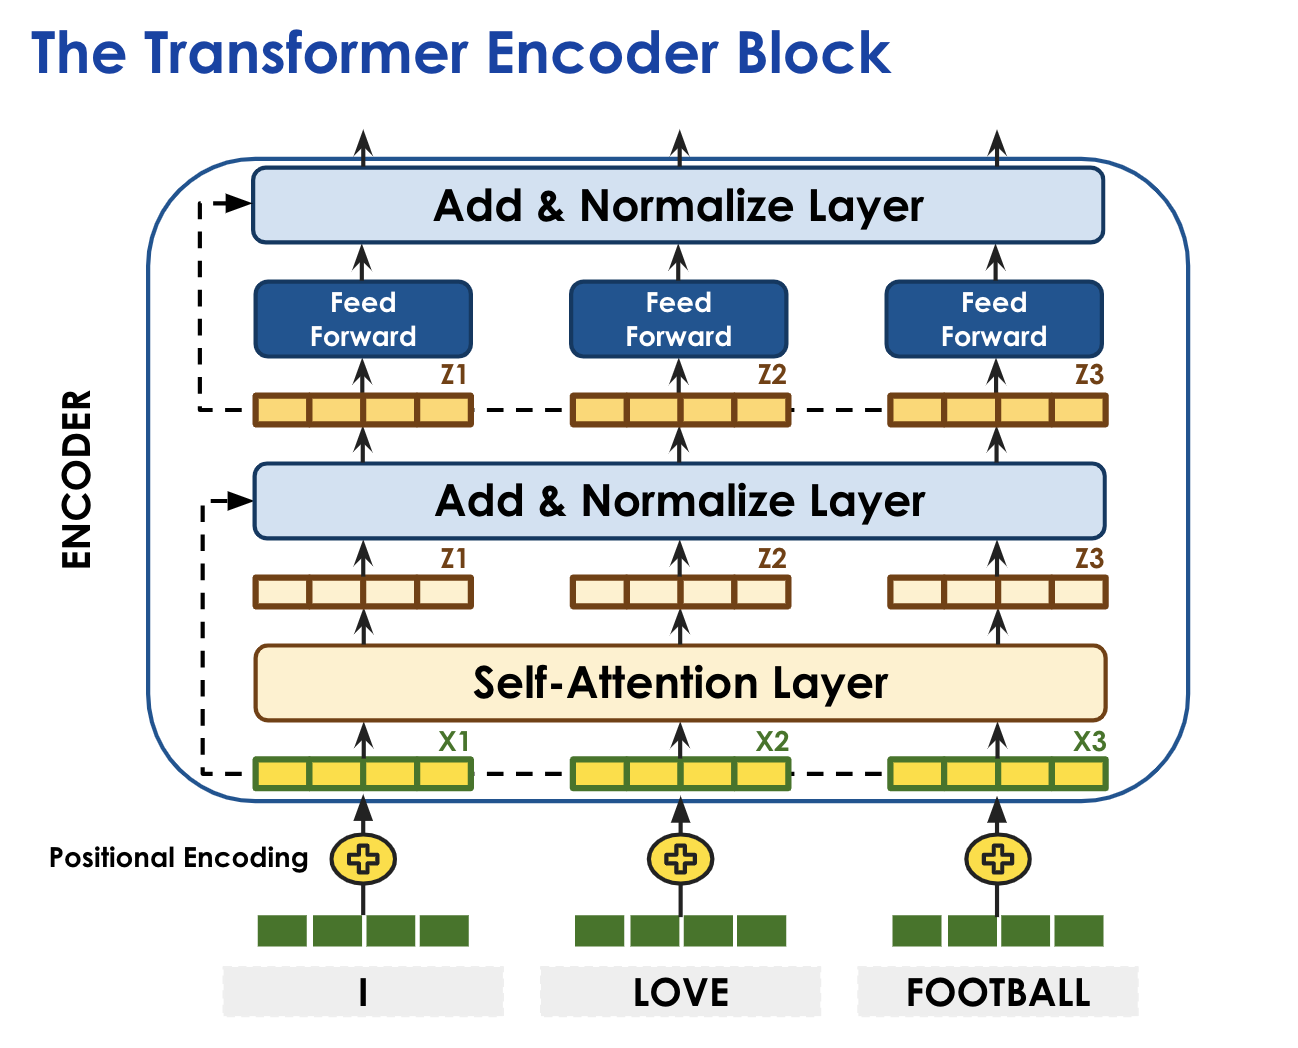

- As visible from the picture above, we feed the output of our Attention layer to an Add and Normalize layer through a Dropout Layer. We will simply use Keras' LayerNormalization() layer, and there we will add the skip input and the output of the previous layer.

- Then we feed the output of the Add and Normalize layer to a simple Feed-Forward Fully Connected Layer (an Artificial Neural Network).

Let's now implement this concept in code.

In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

### **Positional Encoding**

- There is one extra complexity from the Encoder architecture which we haven't addressed yet - **the addition of a Positional Encoding before the embedding is fed into the Self-Attention Layer.**
- The way this works is, we try to encode the word's position into its embedding, with the assumption that the same word while appearing at different parts or indexes within the same sentences can convey slightly different meanings.
- The exact function used for this Position Encoding is also a hyperparameter, as long as it is able to provide unique values for each index / position of word. **The important point is that the information about the word's position is preserved in some way as part of the final embedding fed to the Encoder**, because as we know from language, the position of a word in a sentence is often an important indicator of its contextual meaning.
- We therefore take a time-variant function, such as the Sine/Cosine Function, where each index would result in a different value and we concatenate it with the word embedding, to form the input which we feed into the Transformer Encoder.

**Note:** It's important to remember, this is a step we do before feeding our input into the Transformer Encoder.

This is an example of how to implement Positional Encoding in code.

In [ ]:
  class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positional_encoding = []
        for i in range(len(positions)):
          positional_encoding.append(np.cos(2*np.pi*.73*i))

        positional_encoding = tf.convert_to_tensor(positional_encoding)
        positional_encoding = self.pos_emb(positional_encoding)
        x = self.token_emb(x)
        return x + positional_encoding

- And that's it! This series of steps, put together, is the so-called "Encoder" block - the simplest possible Transformer architecture, which by itself, is full of complexity in comparison to earlier Deep Learning architectures.

- But we are now ready to actually put these pieces together in code and create our model.

## **5. Model Definition**

In [ ]:
embed_dim = 50
heads = 2
neurons = 32
maxlen = 20
vocab_size = 30133

inputs = layers.Input(shape=(maxlen,))
positional_encoding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = positional_encoding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 50)           1507650   
 g_2 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_encoder_2 (Tran  (None, 20, 50)           23832     
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_2   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 50)                0   

## **6. Model Training**

In [ ]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00000001)

In [ ]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32,
                    callbacks=[earlystopping])

Epoch 1/25
1384/1384 [==============================] - 46s 31ms/step - loss: 0.3728 - accuracy: 0.8240 - val_loss: 0.2413 - val_accuracy: 0.9055
Epoch 2/25
1384/1384 [==============================] - 51s 37ms/step - loss: 0.1431 - accuracy: 0.9483 - val_loss: 0.1841 - val_accuracy: 0.9367
Epoch 3/25
1384/1384 [==============================] - 42s 31ms/step - loss: 0.0694 - accuracy: 0.9776 - val_loss: 0.1878 - val_accuracy: 0.9483
Epoch 3: early stopping


## **7. Model Evaluation**

The following are the two learning curves we will plot:

- Loss Curve
- Accuracy Curve

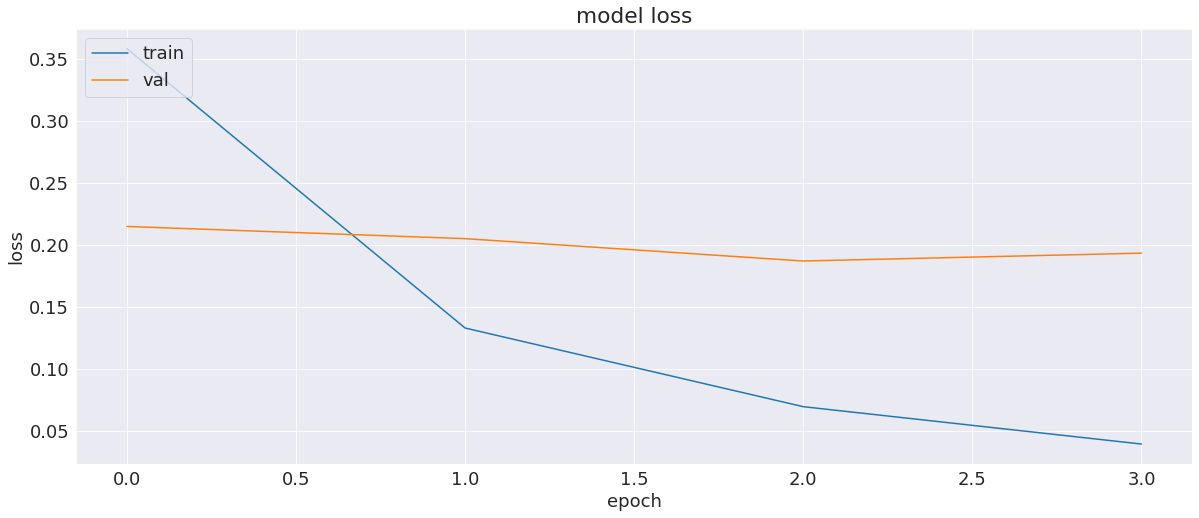

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

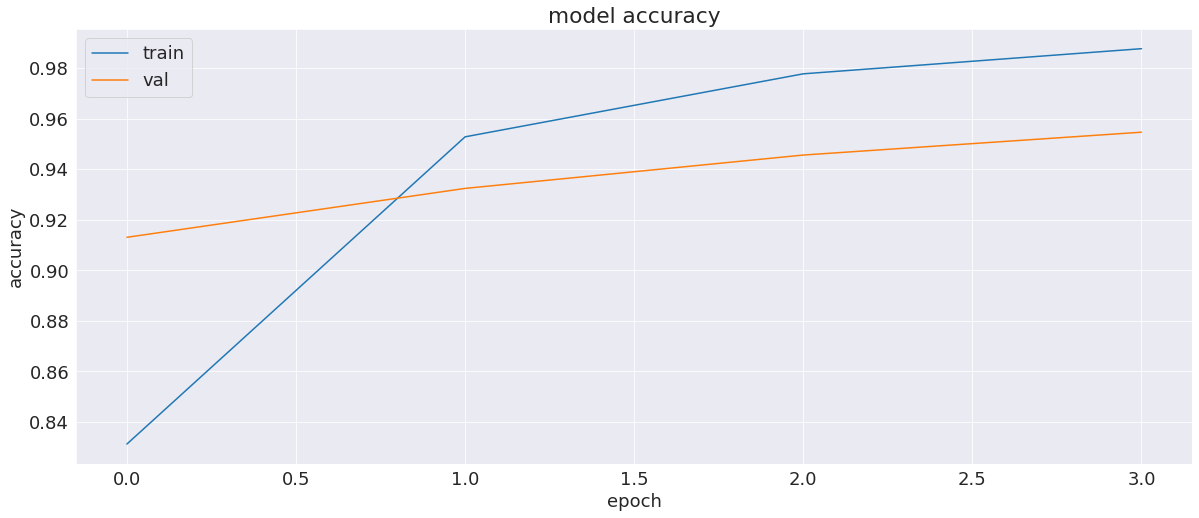

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In case of overfitting, the following traditional methods that we use for Neural Networks still apply:

- Low learning rate
- L1-L2 Regularization
- Dropout
- Lesser Neurons in MLP layers
- Early Stopping

## **8. Classification Metrics**

Since it is important to not misclassify the genuine headlines as sarcastic headlines, we will also look at the ROC-AUC score to avoid misclassification of genuine headlines as sarcastic headlines.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

### **ROC Curve**

173/173 [==============================] - 2s 9ms/step


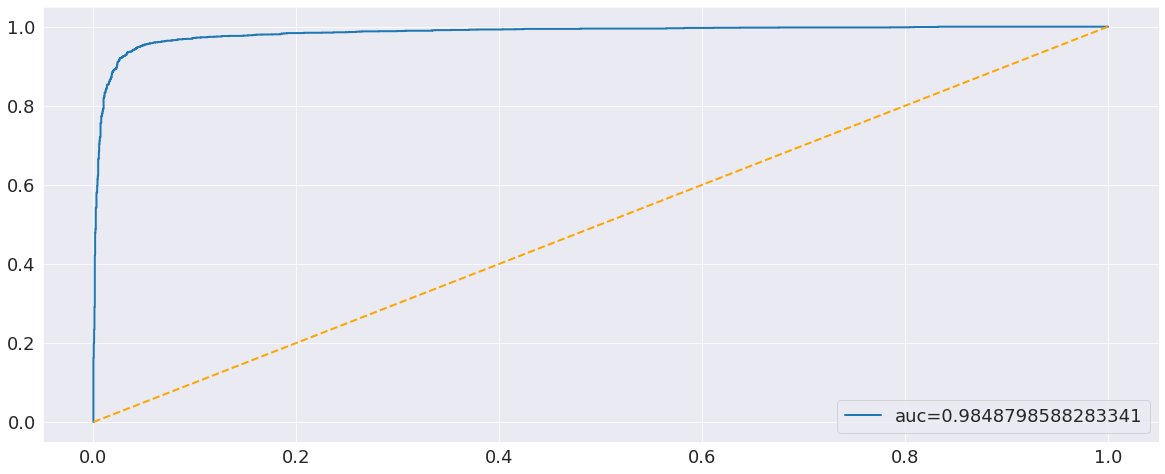

In [ ]:
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

### **Test Set Scores**

In [ ]:
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2997
           1       0.97      0.92      0.94      2536

    accuracy                           0.95      5533
   macro avg       0.95      0.95      0.95      5533
weighted avg       0.95      0.95      0.95      5533



### **Confusion Matrix**

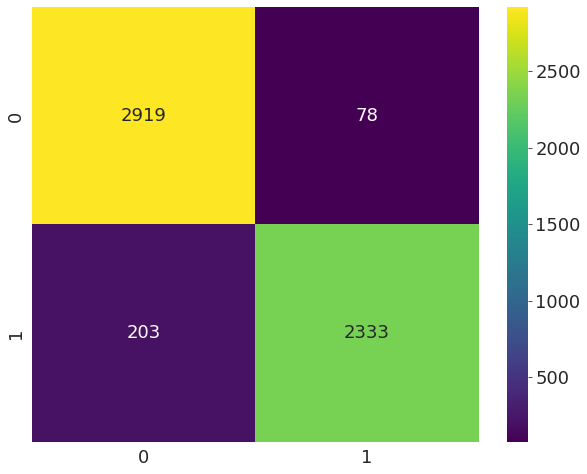

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g',cmap='viridis')

## **9. Conclusions and Recommendations**

- As we're seeing above, **even a relatively simple Encoder-based Transformer architecture performs quite well** on this task of Sarcasm Detection (with F1-scores in the range of 95%), which is one of the harder problems to solve in Text Classification.

- Algorithmically, a single Encoder block despite its complexity, is still relatively less powerful, and modern Transformer models generally comprise of a series of multiple Encoder and Decoder blocks to give the model enough depth and capability for vector space projection.

- Some of the modern Transformer architectures that have typically been used for such NLP problem statements are **BERT, RoBERTa and XLNet**, and we will understand the architectures and specialties for some of these models moving forward.

